In [2]:
#  Imports and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', 50)
sns.set(style="whitegrid")

# load Titanic dataset from seaborn
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#  Quick data inspection
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Missing values and value counts
print("Missing values per column:\n", df.isna().sum())
for col in ['survived','pclass','sex','embarked']:
    print(f"\nValue counts for {col}:\n", df[col].value_counts(dropna=False))


Missing values per column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Value counts for survived:
 survived
0    549
1    342
Name: count, dtype: int64

Value counts for pclass:
 pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value counts for sex:
 sex
male      577
female    314
Name: count, dtype: int64

Value counts for embarked:
 embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


In [5]:
# Cleaning / small fixes (example)
# drop rows where 'embarked' is null (small number)
df_clean = df.copy()
df_clean['age_fill_mean'] = df_clean['age'].fillna(df_clean['age'].median())
df_clean['embarked'] = df_clean['embarked'].fillna(df_clean['embarked'].mode()[0])

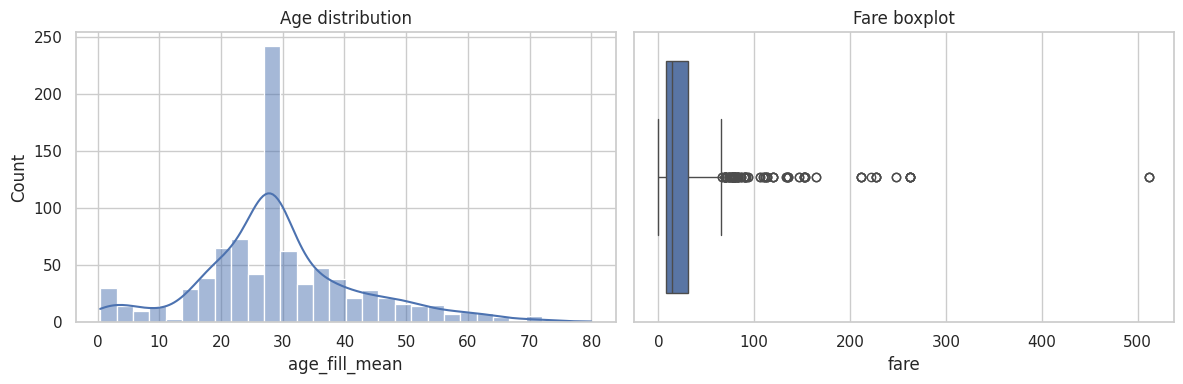

In [6]:
# Univariate plots - numeric
numeric_cols = ['age','fare']
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df_clean['age_fill_mean'], kde=True, ax=axes[0])
axes[0].set_title('Age distribution')
sns.boxplot(x=df_clean['fare'], ax=axes[1])
axes[1].set_title('Fare boxplot')
plt.tight_layout()


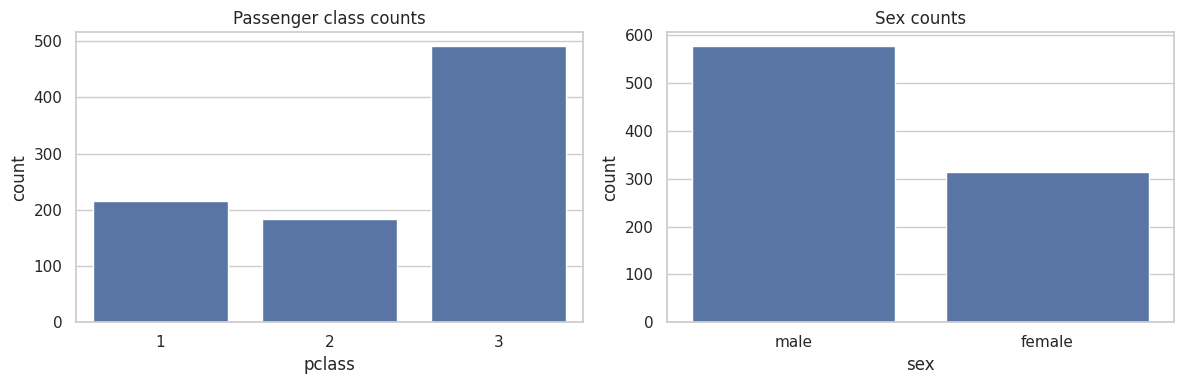

In [7]:
# Univariate plots - categorical
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x='pclass', data=df_clean, ax=axes[0])
axes[0].set_title('Passenger class counts')
sns.countplot(x='sex', data=df_clean, ax=axes[1])
axes[1].set_title('Sex counts')
plt.tight_layout()


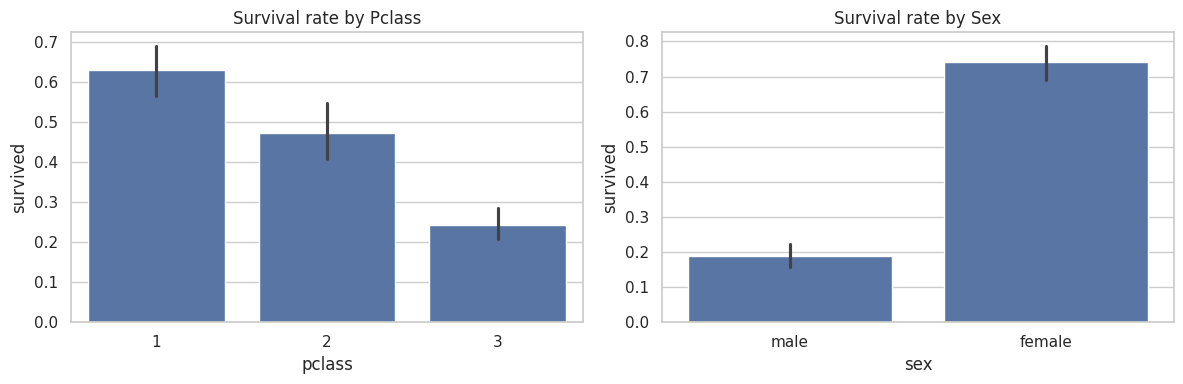

In [8]:
# Bivariate analysis - survival vs categorical
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x='pclass', y='survived', data=df_clean, ax=axes[0])
axes[0].set_title('Survival rate by Pclass')
sns.barplot(x='sex', y='survived', data=df_clean, ax=axes[1])
axes[1].set_title('Survival rate by Sex')
plt.tight_layout()


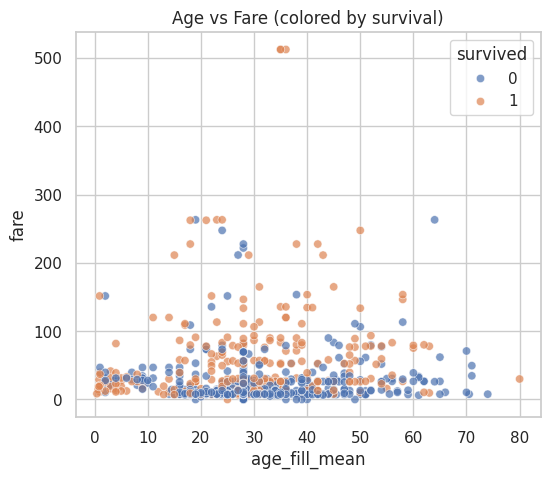

In [9]:
# Bivariate analysis - numeric vs numeric
plt.figure(figsize=(6,5))
sns.scatterplot(x='age_fill_mean', y='fare', hue='survived', data=df_clean, alpha=0.7)
plt.title('Age vs Fare (colored by survival)')
plt.show()


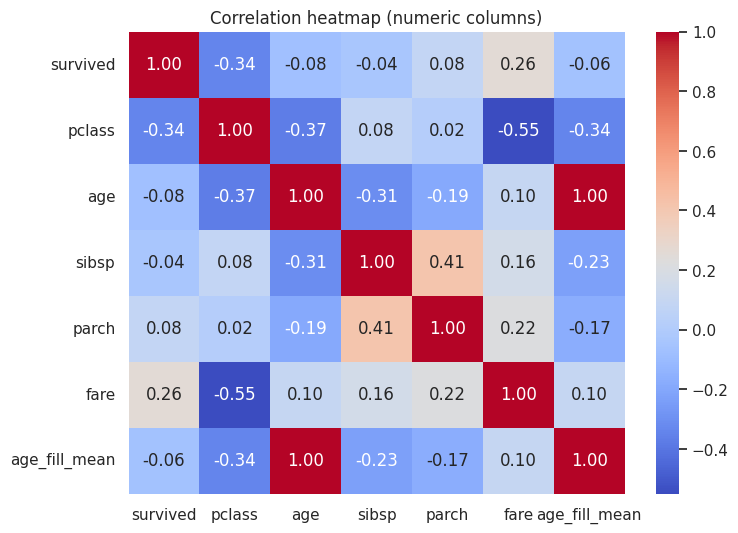

In [10]:
# Correlation heatmap (numeric cols)
num = df_clean.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(num.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation heatmap (numeric columns)')
plt.show()


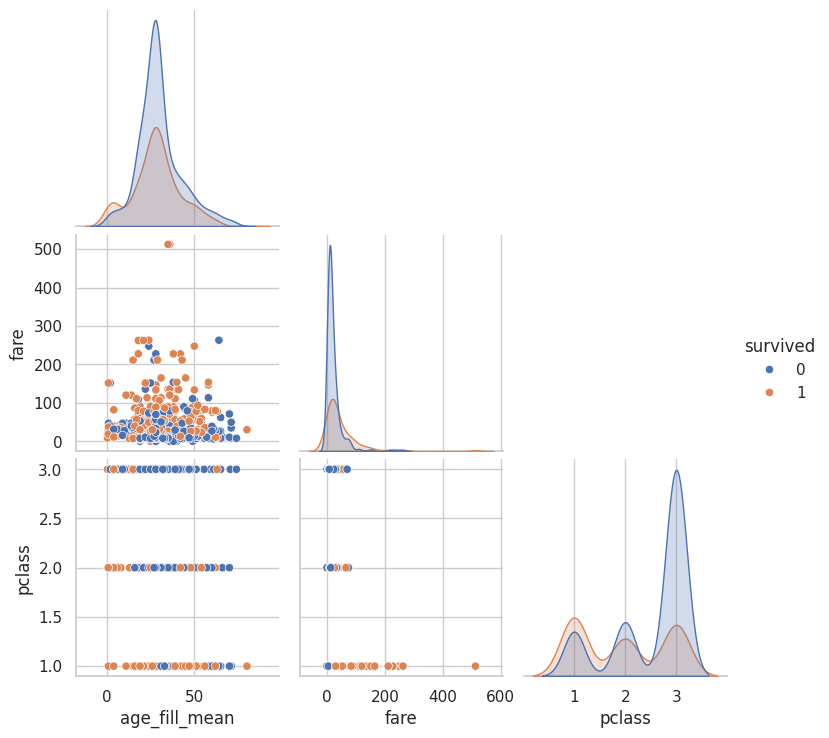

In [11]:
# Pairplot (careful: limit columns for speed)
sns.pairplot(df_clean[['age_fill_mean','fare','survived','pclass']], hue='survived', diag_kind='kde', corner=True)


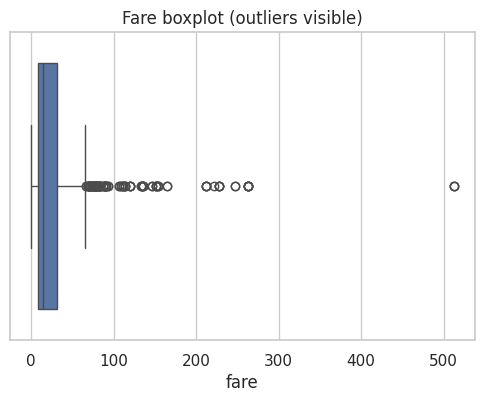

In [12]:
# Identify outliers (example with fare)
plt.figure(figsize=(6,4))
sns.boxplot(x='fare', data=df_clean)
plt.title('Fare boxplot (outliers visible)')
plt.show()


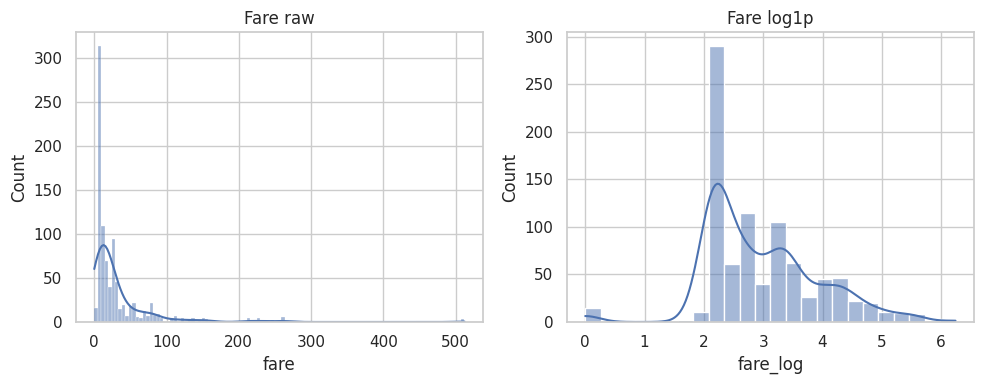

In [13]:
# Handling skew (example log transform of fare)
df_clean['fare_log'] = np.log1p(df_clean['fare'])
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); sns.histplot(df_clean['fare'], kde=True).set_title('Fare raw')
plt.subplot(1,2,2); sns.histplot(df_clean['fare_log'], kde=True).set_title('Fare log1p')
plt.tight_layout()

In [14]:
# Multicollinearity detection (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = num.drop(columns=['survived']).dropna()  # predictors only
X = X.assign(const=1)  # add constant for VIF calc if needed
vif_data = pd.DataFrame({
    'feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
vif_data = vif_data[vif_data['feature']!='const']
vif_data

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,pclass,1.706840
1,age,inf
2,sibsp,1.273264
3,parch,1.229164
4,fare,1.581994
5,age_fill_mean,inf


In [15]:
# Observations & summary
print("Observations:")
print("- Higher survival rate for females vs males.")
print("- Lower-class (3rd) had lower survival rate than 1st/2nd class.")
print("- Fare is highly skewed; log transform makes distribution more symmetric.")
print("- Age has missing values imputed with median; distribution shows many young passengers.")

Observations:
- Higher survival rate for females vs males.
- Lower-class (3rd) had lower survival rate than 1st/2nd class.
- Fare is highly skewed; log transform makes distribution more symmetric.
- Age has missing values imputed with median; distribution shows many young passengers.


In [16]:
df_clean.to_csv('titanic_eda_cleaned.csv', index=False)